**Social Network ads using Logistic Regression**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

**DATA DESCRIPTION**

In [149]:
df = pd.read_csv ('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**First Five rows**

In [150]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**Shape of the data**

In [151]:
df.shape

(400, 3)

**Visualization of numerical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


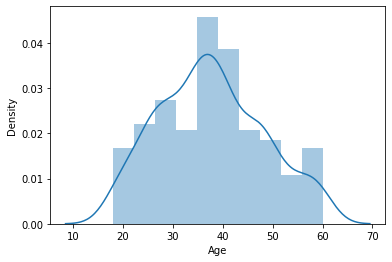

In [152]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


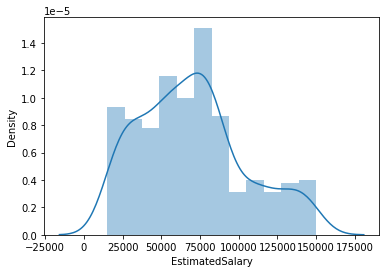

In [153]:
sns.distplot(df['EstimatedSalary'])

In [154]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [155]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

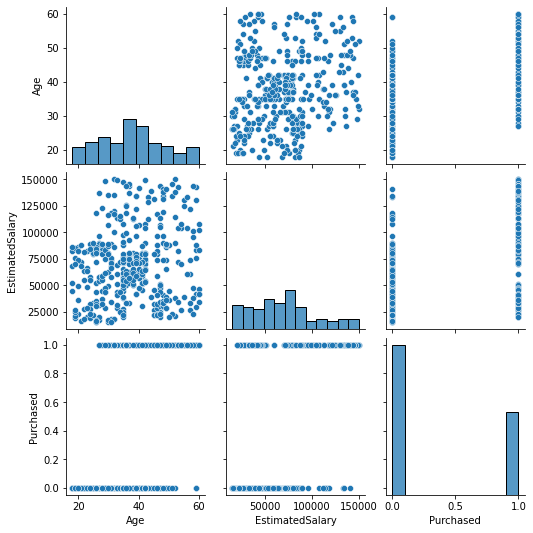

In [156]:
sns.pairplot(df)

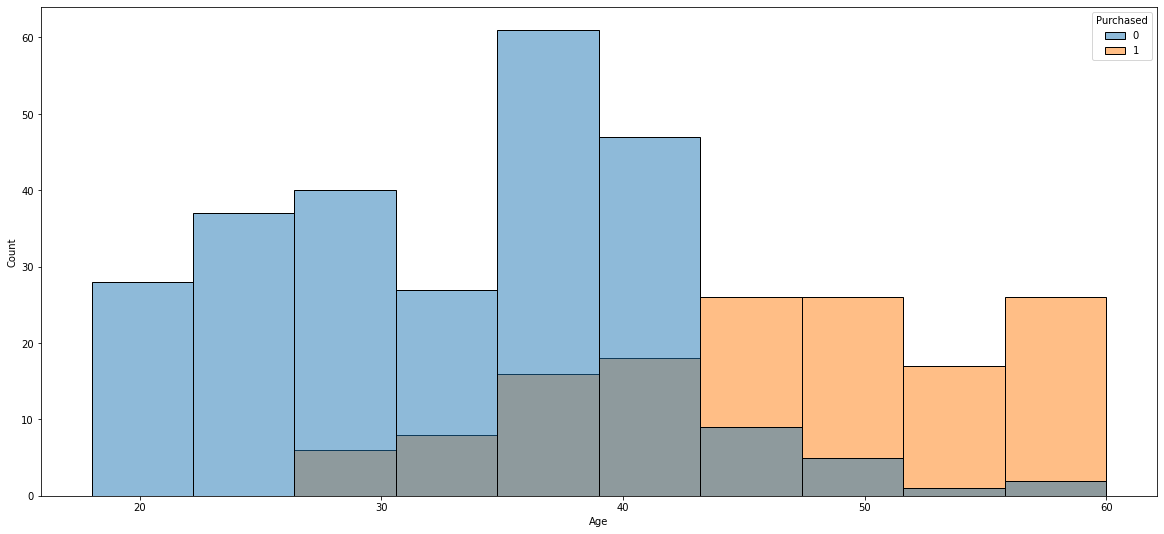

In [157]:
plt.figure(figsize=[20,9])
sns.histplot(x='Age', hue='Purchased', data=df)

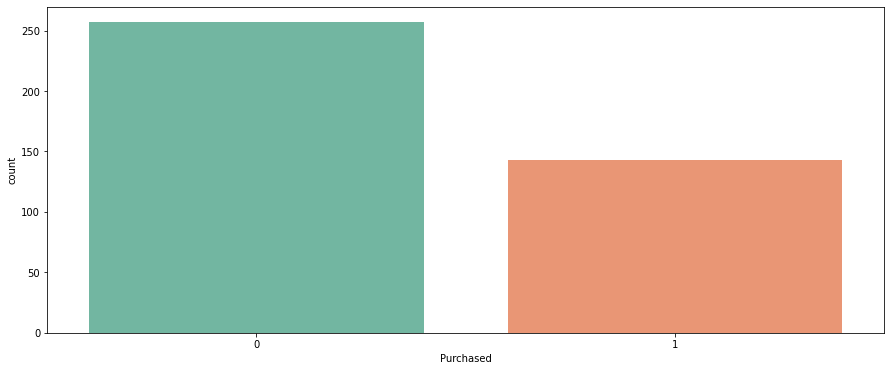

In [158]:
plt.figure(figsize=[15,6])
sns.countplot(x='Purchased', data=df, palette='Set2')

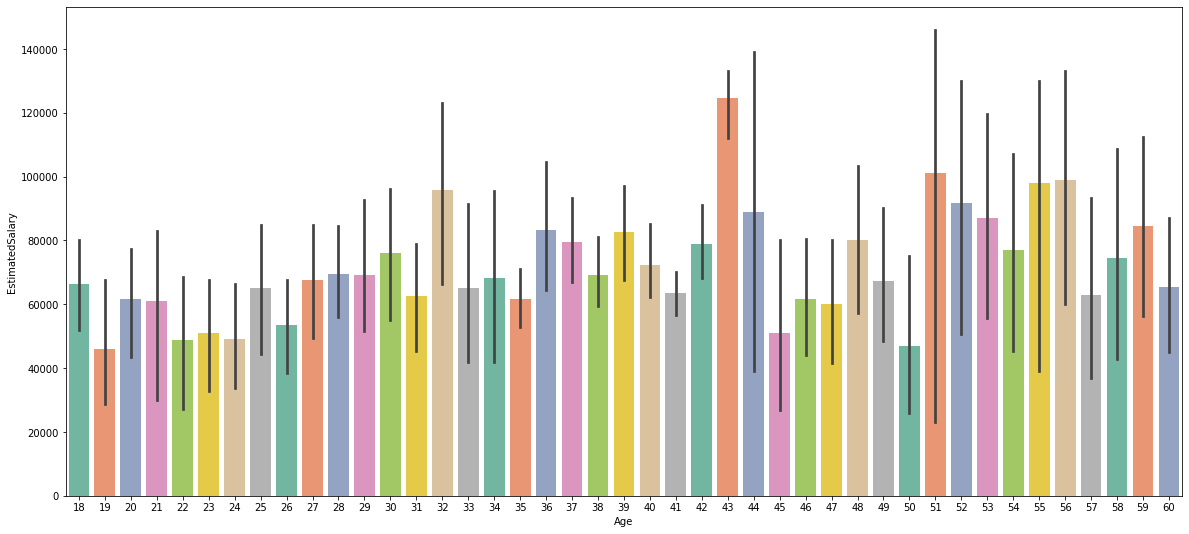

In [159]:
plt.figure(figsize=[20,9])
sns.barplot(x='Age', y='EstimatedSalary', data=df, palette='Set2', )

In [160]:
df.sample()

,Age,EstimatedSalary,Purchased
203,41,71000,0


In [163]:
X = df.iloc[:,0:2]
y = df['Purchased']

In [164]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [165]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

**Split the data**

In [137]:
x = np.asarray(df[['Age','EstimatedSalary']])
y = np.asarray(df['Purchased'])

**Normalize the dataset**

In [166]:
x =preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

**Train/Test data**

In [167]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2,random_state =40)

**Make model**

In [168]:
LR =LogisticRegression (solver='liblinear').fit(train_x,train_y)

pred=LR.predict(test_x)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [169]:
pred_prob = LR.predict_proba(test_x)
pred_prob

array([[0.89777273, 0.10222727],
       [0.50533102, 0.49466898],
       [0.53652724, 0.46347276],
       [0.97694661, 0.02305339],
       [0.71510381, 0.28489619],
       [0.5737222 , 0.4262778 ],
       [0.32137057, 0.67862943],
       [0.61141436, 0.38858564],
       [0.01641663, 0.98358337],
       [0.16020359, 0.83979641],
       [0.64049564, 0.35950436],
       [0.79275103, 0.20724897],
       [0.81164204, 0.18835796],
       [0.12600193, 0.87399807],
       [0.83283811, 0.16716189],
       [0.66305124, 0.33694876],
       [0.98801073, 0.01198927],
       [0.71405795, 0.28594205],
       [0.85732482, 0.14267518],
       [0.62731473, 0.37268527],
       [0.58257289, 0.41742711],
       [0.99484861, 0.00515139],
       [0.08985039, 0.91014961],
       [0.88682573, 0.11317427],
       [0.98806666, 0.01193334],
       [0.98731394, 0.01268606],
       [0.49103294, 0.50896706],
       [0.99229848, 0.00770152],
       [0.57497582, 0.42502418],
       [0.35878944, 0.64121056],
       [0.

**Evaluation**

In [170]:
LR.score(test_x,test_y)

0.8375

**Classification report**

In [171]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.87      0.54      0.67        24

    accuracy                           0.84        80
   macro avg       0.85      0.75      0.78        80
weighted avg       0.84      0.84      0.82        80



NOTE

Accuracy near 0.80 to 0.90 is said to be good or ideal, hence we can accept this model.
Still if we want to increase the accuracy or reduce the amount of errors; for that we can implement various alogithms. and pick the most accurate one.
Here further down I'll use K-Nearest-Neighbors to increase the accuracy score.

**Confusion matrix**

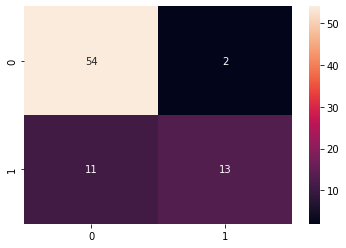

In [172]:
cm =confusion_matrix(test_y,pred)
sns.heatmap(cm, annot=True)
plt.show()